In [41]:
import pandas as pd
import nltk
import MeCab
import re
import string
import matplotlib as mpl
import matplotlib.pyplot as plt
import platform
from wordcloud import WordCloud
import numpy as np

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Darwin":
    mpl.rc("font", family="AppleGothic")
elif platform.system() == "Windows":
    font_name = mpl.font_manager.FontProperties(fname=path).get_name()
    mpl.rc('font', family=font_name)

In [2]:
def pos(text):
    p = re.compile(".+\t[A-Z]+")
    return [tuple(p.match(line).group().split("\t")) for line in MeCab.Tagger().parse(text).splitlines()[:-1]]

def morphs(text):
    p = re.compile(".+\t[A-Z]+")
    return [p.match(line).group().split("\t")[0] for line in MeCab.Tagger().parse(text).splitlines()[:-1]]

def nouns(text):
    p = re.compile(".+\t[A-Z]+")
    temp = [tuple(p.match(line).group().split("\t")) for line in MeCab.Tagger().parse(text).splitlines()[:-1]]
    nouns=[]
    for word in temp:
        if word[1] in ["NNG", "NNP", "NNB", "NNBC", "NP", "NR"]:
            nouns.append(word[0])
    return nouns

def cln(text):
    return re.sub("[^ㄱ-ㅣ가-힣 ]", "", text)

def def_sw(path):
    sw = set()
    for i in string.punctuation:
        sw.add(i)
    with open(path, encoding="utf-8") as f:
        for word in f:
            sw.add(word.split("\n")[0])
    return sw

sw = def_sw("stopwords-ko.txt")

In [3]:
raw_data = pd.read_excel("카톡.xlsx", index_col=0)

In [4]:
data = raw_data

msgs = [msg for msg in data["msg"]]

In [5]:
msgs

['새우당 예약불가네..',
 '빨리 갈수 있는사람 가서 웨이팅 고고',
 '그정도 식당임?',
 '전 빨리 못갑니다',
 '오키도키',
 '님들 다 7시에 도착가능?',
 '7시10분 아님?',
 '7시10분 고',
 '아 ㅋㅋ',
 '깨알 10분',
 '다들 어디?',
 '샤로수길!',
 '올',
 '나 샤대역',
 '난',
 '낙성대',
 '야들아 나 목 간지러움',
 '망한거?',
 '?',
 '긁어',
 'ㄴㄴ 목 안쪽이 가렵다고',
 '왜',
 '몰러 마스크 오래껴서 그런가',
 '이제내림',
 '한정거장 빠른거 탔나보다 니가 ㅋㅋ',
 '여기 사람 별로 없다',
 '도착?',
 '다 도착',
 '알아서 시키삼',
 'ㅇㅋ',
 '간장새우 시킴',
 '거의다옴',
 '재밌었다 안뇽',
 'ㅋㅋㅋㅋ난 아직 사당도 못감',
 '거노 생일즈음에 봅시다',
 '너도 택시타 ㅋㅋ',
 '재미있었다 ㅋㅋㅋㅋ 오키도키 ㅌㅋㅋ',
 '이미 지하철탐ㅌㅋㅋㅋ',
 '술집 48000 분식 6천 편 5천100',
 '거노가 대접했으니까',
 '둘이 내자',
 '어 나 벌써 보내버림',
 'ㅋㅋㅋ',
 '아 감사',
 '맞아 둘이 먹은 술값이 얼만데!',
 '그렇다면 다음 모임에서 사줘',
 'ㅋㅋㅋ',
 '그래 근데 다음에도 3차는 너네집',
 'ㅋㅋㅋ이런',
 '그러네 ㅋㅋㅋㅋㅋ',
 'array에서 shape 함수 쓰면 몇행 몇열인지 알려주자나',
 '근데 (34,23,3) 이러면',
 '3은 무슨 의미냐?',
 '세번째 인자는 뭘 나타내는겨',
 '저는 모든걸 알고 있지는 않기 때문에 ㅋㅋㅋ',
 '코드를 같이 올려주시길 ㅋㅋ',
 '나 위쪽 함수 써본적 없어서 ㅋㅋ',
 '세번째 차원의 크기',
 '넘파이 쓰는거지?',
 '응',
 '세번째 차원이 대체 뭐지',
 'def create_dataset(data,look_back):',
 'train은 2차원인데 trainX는 3차원이네',
 '사진',
 'lstm 쓰려고 52개씩 묶었을 뿐인데 1이 왜생김?',
 '

In [6]:
msgs_joined = " ".join(msgs)

tot_tkns = morphs(msgs_joined)
tot_tkns = [tkn for tkn in tot_tkns if tkn not in sw and len(tkn)>=2]

In [7]:
tot_tkns

['우당',
 '예약',
 '불가',
 '빨리',
 '사람',
 '웨이팅',
 '고고',
 '정도',
 '식당',
 '빨리',
 '갑니다',
 '오키',
 '도키',
 '도착',
 '가능',
 '10',
 '아님',
 '10',
 'ㅋㅋ',
 '깨알',
 '10',
 '대역',
 '낙성대',
 '간지러움',
 '망한',
 '안쪽',
 '가렵',
 '다고',
 '몰러',
 '마스크',
 '오래',
 '껴서',
 '그런가',
 '이제',
 '내림',
 '정거장',
 '빠른',
 '보다',
 'ㅋㅋ',
 '사람',
 '별로',
 '도착',
 '도착',
 '아서',
 '시키',
 'ㅇㅋ',
 '간장',
 '새우',
 '시킴',
 '재밌',
 'ㅋㅋ',
 'ㅋㅋ',
 '아직',
 '사당',
 '생일',
 '즈음',
 '봅시다',
 '택시',
 'ㅋㅋ',
 '재미있',
 'ㅋㅋ',
 'ㅋㅋ',
 '오키',
 'ㅌㅋㅋ',
 '이미',
 '지하철',
 'ㅌㅋㅋㅋ',
 '술집',
 '48000',
 '분식',
 '100',
 '노가',
 '대접',
 '으니까',
 '내자',
 '벌써',
 '보내',
 '버림',
 'ㅋㅋㅋ',
 '감사',
 '술값',
 '얼만데',
 '그렇',
 '다면',
 '모임',
 'ㅋㅋㅋ',
 '근데',
 'ㅋㅋㅋ',
 '그러',
 'ㅋㅋㅋ',
 'ㅋㅋ',
 'array',
 'shape',
 '함수',
 '인지',
 '알려',
 '근데',
 '34',
 '23',
 '이러',
 '의미',
 '인자',
 '나타내',
 '는겨',
 '모든',
 '때문',
 'ㅋㅋㅋ',
 '코드',
 '올려',
 'ㅋㅋ',
 '위쪽',
 '함수',
 '어서',
 'ㅋㅋ',
 '차원',
 '크기',
 '파이',
 '차원',
 '대체',
 'def',
 'create',
 'dataset',
 'data',
 'look',
 'back',
 'train',
 '차원',
 '인데',
 'trainX',
 '차원',
 '사진',
 'lstm',
 '려고',
 '52',
 '인데'

In [8]:
text = nltk.Text(tot_tkns)

text.vocab().most_common(20)

[('ㅋㅋ', 239),
 ('ㅋㅋㅋ', 189),
 ('는데', 42),
 ('사진', 30),
 ('건호', 20),
 ('오키', 17),
 ('그냥', 17),
 ('이렇게', 17),
 ('..', 17),
 ('으면', 17),
 ('데이터', 16),
 ('건가', 16),
 ('ㅇㅇ', 16),
 ('근데', 15),
 ('해서', 15),
 ('https', 15),
 ('그런', 15),
 ('러닝', 15),
 ('어서', 14),
 ('이거', 14)]

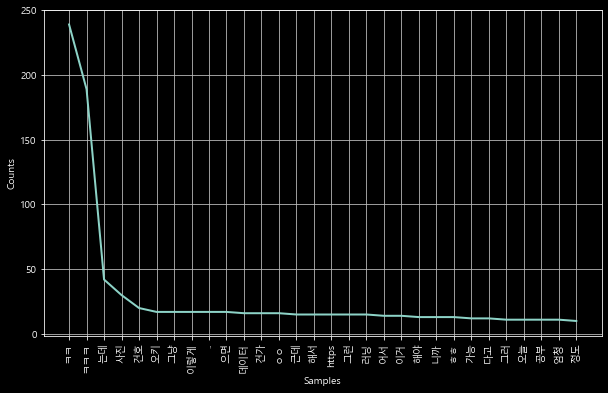

<Figure size 432x288 with 0 Axes>

In [9]:
plt.style.use("dark_background")

plt.figure(figsize=(10, 6))

text.plot(30)

plt.savefig("most_common.png")

In [95]:
words = text.vocab().most_common(1000)

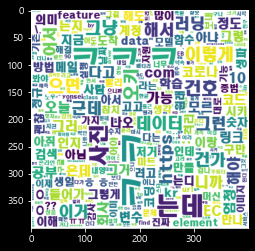

In [101]:
wc = WordCloud(font_path="C:/Windows/Fonts/HMKMRHD.TTF", background_color="white", width=400, height=400, max_words=30000, max_font_size=80)
wc.generate_from_frequencies(dict(words))

plt.imshow(wc)

wc.to_file("test.png")